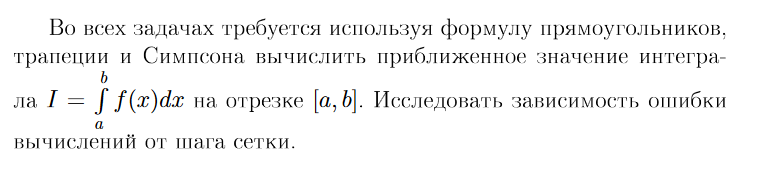

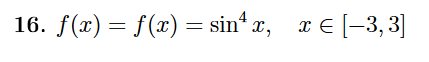

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
# Просто нужные импорты

def f(x):
    return np.sin(x) ** 4
# Сама наша функция

a, b = -3, 3
# Наш отрезок

def real_integral(x):
    return (3 * x / 8) - (np.sin(2 * x) / 4) + (np.sin(4 * x) / 32)
# Точное значение интеграла, полученное аналитически

In [3]:
def rectangle(f, a, b, N):
    h = (b - a) / N
    x_mid = a + h * (np.arange(N) + 0.5)
    return h * np.sum(f(x_mid))
# Формула прямоугольников, смысл в том, чтобы разбить отрезок на N частей и посчитать площадь
# каждого прямоугольника, а затем сложить их. Все давольно просто и понятно. "ширина" прямоугольника
# равна (b - a) / N, а "высота" - это значение функции в середине каждого отрезка.

#### Более красиво
$$
I \approx \sum_{i=0}^{n-1} f\left( \frac{x_i + x_{i+1}}{2} \right) \Delta x
$$

где  $$ ( x_i = a + i \cdot \Delta x ), ( x_{i+1} = a + (i+1) \cdot \Delta x ), ( \Delta x = \frac{b - a}{n} ). $$

In [4]:
def l_rectangle(f, a, b, N):
    h = (b - a) / N
    x_l = a + h * (np.arange(N) + 0)
    return h * np.sum(f(x_l))
# Формула прямоугольников, смысл в том, чтобы разбить отрезок на N частей и посчитать площадь
# каждого прямоугольника, а затем сложить их. Все давольно просто и понятно. "ширина" прямоугольника
# равна (b - a) / N, а "высота" - это значение функции в начале каждого отрезка.

#### Более красиво
$$
I \approx \sum_{i=0}^{n-1} f(x_i) \Delta x
$$

где $$ ( x_i = a + i \cdot \Delta x ), ( \Delta x = \frac{b - a}{n} )$$

In [5]:
def r_rectangle(f, a, b, N):
    h = (b - a) / N
    x_r = a + h * (np.arange(N) + 1)
    return h * np.sum(f(x_r))
# Формула прямоугольников, смысл в том, чтобы разбить отрезок на N частей и посчитать площадь
# каждого прямоугольника, а затем сложить их. Все давольно просто и понятно. "ширина" прямоугольника
# равна (b - a) / N, а "высота" - это значение функции в конце каждого отрезка.

#### Более красиво
$$
I \approx \sum_{i=1}^{n} f(x_i) \Delta x
$$

где  $$ ( x_i = a + i \cdot \Delta x ), ( \Delta x = \frac{b - a}{n} )$$

In [6]:
def trapezoidal(f, a, b, N):
    h = (b - a) / N
    x = a + h * np.arange(N + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:N]) + y[N])
# Формула трапеции, смысл в том чтобы строить тропецию с основанием на оси x, а верхнюю грань
# строить по значениям функции в точках, начала и конца рассматриваемого отрезка. На фото нагляднее.

#### Более красиво
$$
I \approx \frac{\Delta x}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

где $$ ( \Delta x = \frac{b - a}{n} ), и ( x_i = a + i \cdot \Delta x ). $$
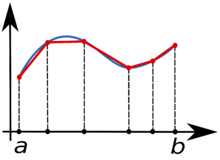

In [7]:
def simpson(f, a, b, N):
    if N % 2 == 1:
        N += 1  # Нам обязательно нужно четное число разбиений, иначе метод не работает
    h = (b - a) / N
    x = a + h * np.arange(N + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:N:2]) + 2 * np.sum(y[2:N-1:2]) + y[N])
# Смысл метода что делаем все то же самое как и в методе трапеций, только "крышка" фигуры это
# парабола, а не прямая.

#### Более красиво
$$
I \approx \frac{\Delta x}{3} \left[ f(a) + 4 \sum_{i=1, \text{чет.}}^{n-1} f(x_i) + 2 \sum_{i=2, \text{неч.}}^{n-2} f(x_i) + f(b) \right]
$$

где  $$ ( \Delta x = \frac{b - a}{n} ), и ( x_i = a + i \cdot \Delta x ). $$
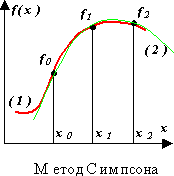

In [8]:
def compute_errors(f, a, b, N_values, I_exact):
    errors_rect = []
    errors_rect_l = []
    errors_rect_r = []
    errors_trap = []
    errors_simp = []
    h_values = []
    
    for N in N_values:
        h = (b - a) / N
        I_rect = rectangle(f, a, b, N)
        I_trap = trapezoidal(f, a, b, N)
        I_simp = simpson(f, a, b, N)
        I_rect_l = l_rectangle(f, a, b, N)
        I_rect_r = r_rectangle(f, a, b, N)
        
        errors_rect.append(abs(I_rect - I_exact))
        errors_rect_l.append(abs(I_rect_l - I_exact))
        errors_rect_r.append(abs(I_rect_r - I_exact))
        errors_trap.append(abs(I_trap - I_exact))
        errors_simp.append(abs(I_simp - I_exact))
        h_values.append(h)
    
    return h_values, errors_rect, errors_trap, errors_simp, errors_rect_l, errors_rect_r

# Функция для подсчета ошибок каждого метода


 N      h          Прямоугольник     Левый прямоугольник    правый прямоугольнык     Трапеция      Симпсон
10    0.600000    8.931290e-04    7.085646e-04    7.085646e-04    7.085646e-04    1.467927e-02    
20    0.300000    1.784158e-05    9.228223e-05    9.228223e-05    9.228223e-05    3.592312e-04    
40    0.150000    1.691299e-05    3.722033e-05    3.722033e-05    3.722033e-05    1.886636e-05    
80    0.075000    4.971838e-06    1.015367e-05    1.015367e-05    1.015367e-05    1.131452e-06    
160   0.037500    1.288913e-06    2.590916e-06    2.590916e-06    2.590916e-06    6.999824e-08    
320   0.018750    3.250921e-07    6.510019e-07    6.510019e-07    6.510019e-07    4.363784e-09    
640   0.009375    8.145190e-08    1.629549e-07    1.629549e-07    1.629549e-07    2.725633e-10    
1280  0.004687    2.037415e-08    4.075150e-08    4.075150e-08    4.075150e-08    1.703215e-11    


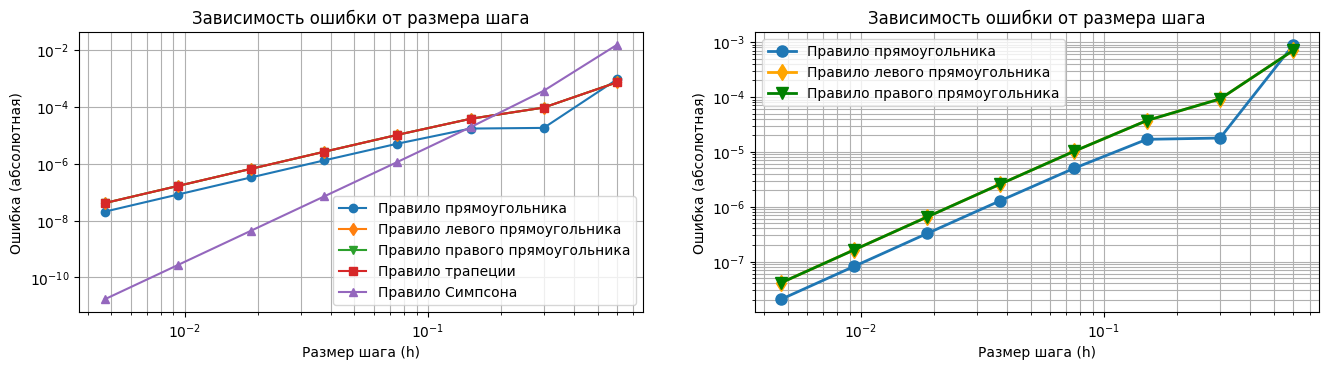

In [9]:
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]
I_real = real_integral(b) - real_integral(a)
h_values, errors_rect, errors_trap, errors_simp, errors_rect_l, errors_rect_r =\
compute_errors(f, a, b, N_values, I_real)

print("\n N      h          Прямоугольник     Левый прямоугольник    правый прямоугольнык\
     Трапеция      Симпсон")
for i in range(len(N_values)):
    print(f"{N_values[i]:<6}{h_values[i]:<12.6f}{errors_rect[i]:<16.6e}{errors_rect_l[i]:<16.6e}\
{errors_rect_r[i]:<16.6e}{errors_trap[i]:<16.6e}{errors_simp[i]:<16.6e}")

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.loglog(h_values, errors_rect, 'o-', label='Правило прямоугольника')
plt.loglog(h_values, errors_rect_l, 'd-', label='Правило левого прямоугольника')
plt.loglog(h_values, errors_rect_r, 'v-', label='Правило правого прямоугольника')
plt.loglog(h_values, errors_trap, 's-', label='Правило трапеции')
plt.loglog(h_values, errors_simp, '^-', label="Правило Симпсона")
plt.xlabel('Размер шага (h)')
plt.ylabel('Ошибка (абсолютная)')
plt.title('Зависимость ошибки от размера шага')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.subplot(2, 2, 2)
plt.loglog(h_values, errors_rect, 'o-', label='Правило прямоугольника', markersize=8, linewidth=2)
plt.loglog(h_values, errors_rect_l, 'd-', color='orange', label='Правило левого прямоугольника', markersize=8, linewidth=2)
plt.loglog(h_values, errors_rect_r, 'v-', color='green', label='Правило правого прямоугольника', markersize=8, linewidth=2)
plt.xlabel('Размер шага (h)')
plt.ylabel('Ошибка (абсолютная)')
plt.title('Зависимость ошибки от размера шага')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

тангенсы графиков ошибок, сделать больше шагов


 N      h          Прямоугольник     Левый прямоугольник    правый прямоугольнык     Трапеция      Симпсон
10    0.600000    8.931290e-04    7.085646e-04    7.085646e-04    7.085646e-04    1.467927e-02    
20    0.300000    1.784158e-05    9.228223e-05    9.228223e-05    9.228223e-05    3.592312e-04    
40    0.150000    1.691299e-05    3.722033e-05    3.722033e-05    3.722033e-05    1.886636e-05    
80    0.075000    4.971838e-06    1.015367e-05    1.015367e-05    1.015367e-05    1.131452e-06    
160   0.037500    1.288913e-06    2.590916e-06    2.590916e-06    2.590916e-06    6.999824e-08    
320   0.018750    3.250921e-07    6.510019e-07    6.510019e-07    6.510019e-07    4.363784e-09    
640   0.009375    8.145190e-08    1.629549e-07    1.629549e-07    1.629549e-07    2.725633e-10    
1280  0.004687    2.037415e-08    4.075150e-08    4.075150e-08    4.075150e-08    1.703215e-11    
2560  0.002344    5.094237e-09    1.018867e-08    1.018867e-08    1.018867e-08    1.064482e-12    
5

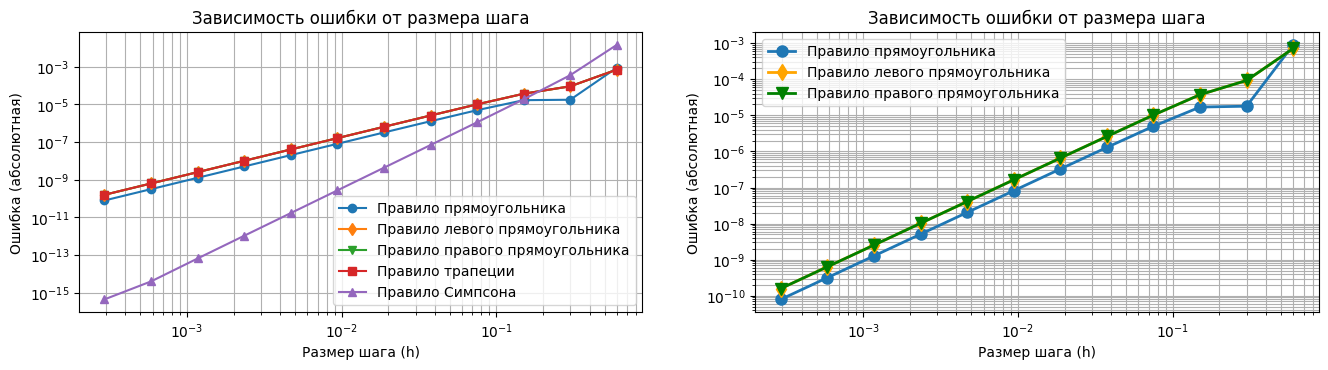

Tangents (Slopes) of the lines:
Rectangle Rule: 1.98
Left Rectangle Rule: 1.97
Right Rectangle Rule: 1.97
Trapezoidal Rule: 1.97
Simpson's Rule: 4.05


In [15]:
from scipy.stats import linregress

N_values = [10, 20, 40, 80, 160, 320, 640, 1280, 1280*2, 1280*4, 1280*8, 1280*16]
I_real = real_integral(b) - real_integral(a)
h_values, errors_rect, errors_trap, errors_simp, errors_rect_l, errors_rect_r =\
compute_errors(f, a, b, N_values, I_real)

print("\n N      h          Прямоугольник     Левый прямоугольник    правый прямоугольнык\
     Трапеция      Симпсон")
for i in range(len(N_values)):
    print(f"{N_values[i]:<6}{h_values[i]:<12.6f}{errors_rect[i]:<16.6e}{errors_rect_l[i]:<16.6e}\
{errors_rect_r[i]:<16.6e}{errors_trap[i]:<16.6e}{errors_simp[i]:<16.6e}")

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.loglog(h_values, errors_rect, 'o-', label='Правило прямоугольника')
plt.loglog(h_values, errors_rect_l, 'd-', label='Правило левого прямоугольника')
plt.loglog(h_values, errors_rect_r, 'v-', label='Правило правого прямоугольника')
plt.loglog(h_values, errors_trap, 's-', label='Правило трапеции')
plt.loglog(h_values, errors_simp, '^-', label="Правило Симпсона")
plt.xlabel('Размер шага (h)')
plt.ylabel('Ошибка (абсолютная)')
plt.title('Зависимость ошибки от размера шага')
plt.legend()
plt.grid(True, which="both", ls="-")

plt.subplot(2, 2, 2)
plt.loglog(h_values, errors_rect, 'o-', label='Правило прямоугольника', markersize=8, linewidth=2)
plt.loglog(h_values, errors_rect_l, 'd-', color='orange', label='Правило левого прямоугольника', markersize=8, linewidth=2)
plt.loglog(h_values, errors_rect_r, 'v-', color='green', label='Правило правого прямоугольника', markersize=8, linewidth=2)
plt.xlabel('Размер шага (h)')
plt.ylabel('Ошибка (абсолютная)')
plt.title('Зависимость ошибки от размера шага')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

def calculate_slope(h_values, errors):
    log_h = np.log(h_values)
    log_errors = np.log(errors)
    slope, _, _, _, _ = linregress(log_h, log_errors)
    return slope

slope_rect = calculate_slope(h_values, errors_rect)
slope_rect_l = calculate_slope(h_values, errors_rect_l)
slope_rect_r = calculate_slope(h_values, errors_rect_r)
slope_trap = calculate_slope(h_values, errors_trap)
slope_simp = calculate_slope(h_values, errors_simp)

print("Tangents (Slopes) of the lines:")
print(f"Rectangle Rule: {slope_rect:.2f}")
print(f"Left Rectangle Rule: {slope_rect_l:.2f}")
print(f"Right Rectangle Rule: {slope_rect_r:.2f}")
print(f"Trapezoidal Rule: {slope_trap:.2f}")
print(f"Simpson's Rule: {slope_simp:.2f}")
